In [28]:
import xgboost
import shap
import pandas as pd

In [29]:
shap.initjs()

In [90]:
#importar dataset
dataset = pd.read_csv('../datasets/1151commitsWithNewFeatures.csv',index_col=0)

In [91]:
#convertendo os label em numeros inteiros
dataset['results'] = 0
def categoriza(s):
    if s == 'a': 
        return 0  #adaptive
    elif s == 'c':
        return 1   #corrective
    elif s == 'p':
        return 2 # perfective
dataset['results'] = dataset['label'].apply(categoriza)

In [92]:
dataset = dataset.drop(columns=['project'])
dataset = dataset.drop(columns=['comment'])
dataset = dataset.drop(columns=['label'])

In [93]:
X = dataset
y = dataset.iloc[:,71].values #o que deve ser predito

In [94]:
X = X.drop(columns=['results'])

In [98]:
# train XGBoost model
#X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

In [99]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [102]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [79]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


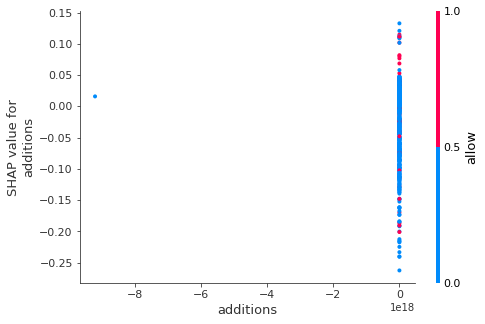

In [80]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("additions", shap_values, X)

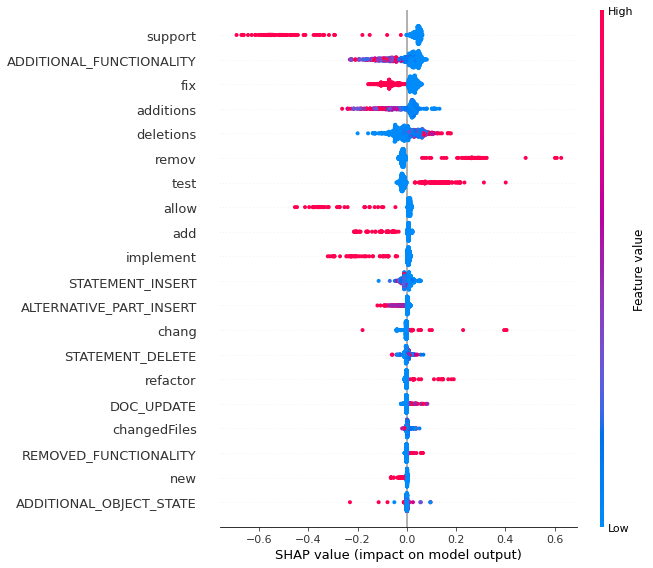

In [81]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

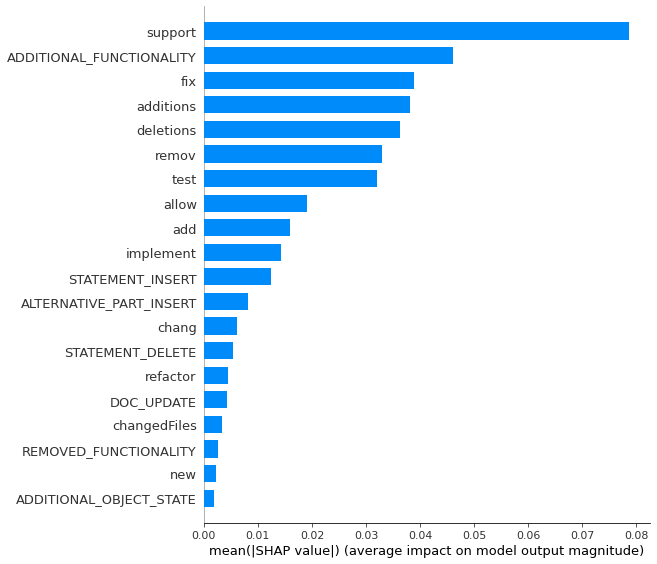

In [82]:
shap.summary_plot(shap_values, X, plot_type="bar")